In [11]:
from os import listdir
from matplotlib import image
import random
import numpy as np
from dataclasses import dataclass

# load all images in a directory
np.random.RandomState(9)
random_indexes = np.random.choice(range(25000), 250)
loaded_images = list()
for i in range(250):
	# load image
	filename = 'im' + str(random_indexes[i]) + '.jpg'
	img_data = image.imread('mirflickr25k/mirflickr/' + filename)
	# store loaded image
	loaded_images.append(img_data)
	print('> loaded %s %s' % (filename, img_data.shape))

> loaded im24126.jpg (344, 500, 3)
> loaded im1163.jpg (439, 500, 3)
> loaded im8871.jpg (500, 366, 3)
> loaded im154.jpg (375, 500, 3)
> loaded im17980.jpg (375, 500, 3)
> loaded im18583.jpg (500, 422, 3)
> loaded im8499.jpg (500, 333, 3)
> loaded im17800.jpg (375, 500, 3)
> loaded im3726.jpg (333, 500, 3)
> loaded im20979.jpg (375, 500, 3)
> loaded im6194.jpg (375, 500, 3)
> loaded im23236.jpg (333, 500, 3)
> loaded im294.jpg (334, 500, 3)
> loaded im22160.jpg (292, 500, 3)
> loaded im9638.jpg (410, 500, 3)
> loaded im8301.jpg (500, 337, 3)
> loaded im13699.jpg (500, 340, 3)
> loaded im9816.jpg (500, 500, 3)
> loaded im15433.jpg (375, 500, 3)
> loaded im17260.jpg (327, 500, 3)
> loaded im5528.jpg (375, 500, 3)
> loaded im9525.jpg (500, 500, 3)
> loaded im22784.jpg (359, 500, 3)
> loaded im21700.jpg (375, 500, 3)
> loaded im10292.jpg (335, 500, 3)
> loaded im22287.jpg (376, 500, 3)
> loaded im6427.jpg (333, 500, 3)
> loaded im18081.jpg (373, 500, 3)
> loaded im10553.jpg (333, 500, 3)


> loaded im19648.jpg (500, 375, 3)
> loaded im19122.jpg (500, 375, 3)
> loaded im16290.jpg (500, 372, 3)
> loaded im4866.jpg (333, 500, 3)
> loaded im23220.jpg (419, 500, 3)
> loaded im23178.jpg (333, 500, 3)
> loaded im5843.jpg (500, 325, 3)
> loaded im20301.jpg (500, 334, 3)
> loaded im1695.jpg (333, 500, 3)
> loaded im24249.jpg (500, 375, 3)


In [12]:
#1.
values = np.zeros((3, 256))
index = 0
for image in loaded_images:
	for i in range(image.shape[0]):
		for j in range(image.shape[1]):
			values[0][image[i][j][0]] += 1
			values[1][image[i][j][1]] += 1
			values[2][image[i][j][2]] += 1
	index += 1
	if (index % 10) == 0:
		print('> processed %i images' % (index))

> processed 10 images
> processed 20 images
> processed 30 images
> processed 40 images
> processed 50 images
> processed 60 images
> processed 70 images
> processed 80 images
> processed 90 images
> processed 100 images
> processed 110 images
> processed 120 images
> processed 130 images
> processed 140 images
> processed 150 images
> processed 160 images
> processed 170 images
> processed 180 images
> processed 190 images
> processed 200 images
> processed 210 images
> processed 220 images
> processed 230 images
> processed 240 images
> processed 250 images


In [13]:
RED = 0
GREEN = 1
BLUE = 2
#2.a. max and min finding
print('Red:\t', end='')
for i in range(255, 0, -1):
    if (values[RED][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[RED][i] != 0):
        print('Min - {}'.format(i))
        break

print('Green:\t', end='')
for i in range(255, 0, -1):
    if (values[GREEN][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[GREEN][i] != 0):
        print('Min - {}'.format(i))
        break

print('Blue:\t', end='')
for i in range(255, 0, -1):
    if (values[BLUE][i] != 0):
        print('Max - {}, '.format(i), end='')
        break
for i in range(0, 255):
    if (values[BLUE][i] != 0):
        print('Min - {}'.format(i))
        break

Red:	Max - 255, Min - 0
Green:	Max - 255, Min - 0
Blue:	Max - 255, Min - 0


In [14]:
#2.b Mat ochikuvannya i dispersiya 
#RED
sum_val = sum(values[RED])
M_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    M_red += p * index
D_red = 0
for index in range(len(values[RED])):
    p = (values[RED][index] / sum_val)
    D_red += p * ((index - M_red) ** 2)
print("Red:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_red, D_red))

#GREEN
sum_val = sum(values[GREEN])
M_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    M_green += p * index
D_green = 0
for index in range(len(values[GREEN])):
    p = (values[GREEN][index] / sum_val)
    D_green += p * ((index - M_green) ** 2)
print("Green:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_green, D_green))
    
#BLUE
sum_val = sum(values[BLUE])
M_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    M_blue += p * index
D_blue = 0
for index in range(len(values[BLUE])):
    p = (values[BLUE][index] / sum_val)
    D_blue += p * ((index - M_blue) ** 2)
print("Blue:\tmat ochikuvannya - {0:.2f},\tdispersiya - {1:.2f}"\
.format(M_blue, D_blue))

Red:	mat ochikuvannya - 118.28,	dispersiya - 6296.13
Green:	mat ochikuvannya - 110.07,	dispersiya - 5808.93
Blue:	mat ochikuvannya - 101.26,	dispersiya - 6283.31


In [15]:
#2.c Median and interquartal rozmah

def medianFinder(array_values):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        summa += array_values[index]
        if (summa > (sum_val / 2)):
            return index - 1
        if (summa == (sum_val / 2)):
            return (2 * index + 1) / 2

def quartFinder(array_values, quart):
    sum_val = sum(array_values)
    summa = 0
    for index in range(len(array_values)):
        prev_sum = summa
        p = array_values[index] /  sum_val
        summa += p
        if (summa > quart):
            if (quart - prev_sum < summa - quart):
                return index - 1
            elif (quart - prev_sum > summa - quart):
                return index
            else:
                return (2 * index - 1) / 2

#RED
print('Red:\tmedian - {0},\tIQR - {1}'.format(medianFinder(values[RED]),\
quartFinder(values[RED], 0.75) - quartFinder(values[RED], 0.25)))
print('Green:\tmedian - {0},\tIQR - {1}'.format(medianFinder(values[GREEN]),\
quartFinder(values[GREEN], 0.75) - quartFinder(values[GREEN], 0.25)))
print('Blue:\tmedian - {0},\tIQR - {1}'.format(medianFinder(values[BLUE]),\
quartFinder(values[BLUE], 0.75) - quartFinder(values[BLUE], 0.25)))

Red:	median - 115,	IQR - 139
Green:	median - 103,	IQR - 130
Blue:	median - 87,	IQR - 138


In [16]:
def E_operator(arr_values, M, power):
    sum_val = sum(arr_values)
    ans = 0
    for index in range(len(arr_values)):
        p = (arr_values[index] / sum_val)
        ans += p * ((index - M) ** power)
    return ans
        
#2.d Asimmetriya, ekscess
Asym_red = E_operator(values[RED], M_red, 3) / (D_red ** (3 / 2))
Asym_green = E_operator(values[GREEN], M_green, 3) / (D_green ** (3 / 2))
Asym_blue = E_operator(values[BLUE], M_blue, 3) / (D_blue ** (3 / 2))

Ekscess_red = E_operator(values[RED], M_red, 4) / (D_red ** 2) - 3
Ekscess_green = E_operator(values[GREEN], M_green, 4) / (D_green ** 2) - 3
Ekscess_blue = E_operator(values[BLUE], M_blue, 4) / (D_blue ** 2) - 3
print('Red:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_red, Ekscess_red))
print('Green:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_green, Ekscess_green))
print('Blue:\tAsimmetriya - {0:.3f},\tEkscess - {1:.3f}'\
.format(Asym_blue, Ekscess_blue))

Red:	Asimmetriya - 0.091,	Ekscess - -1.238
Green:	Asimmetriya - 0.212,	Ekscess - -1.137
Blue:	Asimmetriya - 0.404,	Ekscess - -1.101


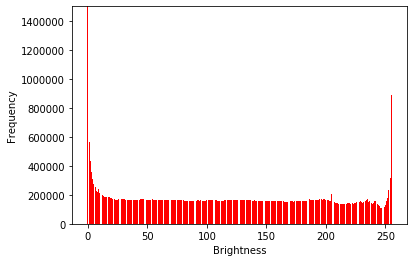

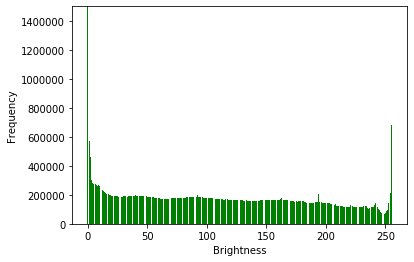

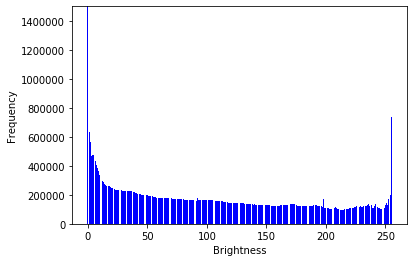

In [17]:
import matplotlib.pyplot as plt
#3. Histograms
x = range(256)

#RED
plt.bar(x,values[RED],color='red')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#GREEN
plt.bar(x,values[GREEN],color='green')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()
#BLUE
plt.bar(x,values[BLUE],color='blue')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.ylim(top=1500000)
plt.show()

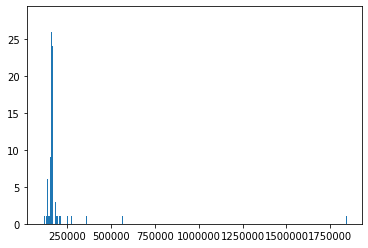

In [18]:
import seaborn as sns
test = values[RED]
plt.hist(test,bins = 1000)
plt.show()

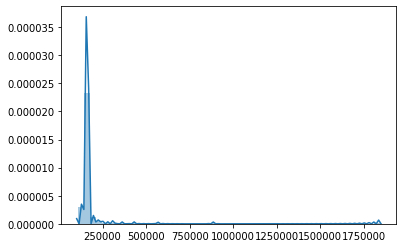

In [19]:
X,Y = sns.distplot(np.ravel(test)).get_lines()[0].get_data()

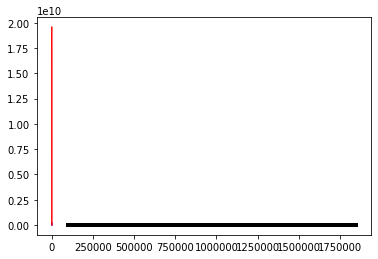

In [20]:
from scipy import stats
test = np.ravel(test)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(0, 255, len(X))

m, s = stats.norm.fit((X,Y))# get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm",color = 'grey') # plot it
plt.plot(X,Y,color = 'black',linewidth = 4)

plt.plot(lnspc, pdf_g, label="Norm") # plot it
ag,bg,cg = stats.gamma.fit((X,Y))  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma",color = 'blue')


ab,bb,cb,db = stats.beta.fit((X,Y))
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta",color = 'red')

plt.show()